*First compiled: May 2, 2017.*

# Myeloid progenitors of data of [Paul *et al.*, Cell (2015)](http://doi.org/10.1016/j.cell.2015.11.013)

Hematopoiesis: trace myeloid and erythroid differentiation for data of [Paul *et al.*, Cell (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)    # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.3 on 2017-11-17 02:10.


### Simple DPT analysis

Perform a Diffusion Pseudotime analysis on raw data, as in [Haghverdi *et al.* (2016)](http://doi.org/10.1038/nmeth.3971). No preprocessing, only logarthmize the raw counts.

In [2]:
# get the raw gene expression
adata = sc.datasets.paul15_raw()
# logarithmize data
sc.pp.log1p(adata)
# set root cell as in Haghverdi et al. (2016)                                                                                                                                    
adata.uns['iroot'] = 840  # note that other than in Matlab/R, counting starts at 1

... storing paul15_clusters as categorical type
--> access categories as adata.smp.paul15_clusters.cat.categories


In [3]:
sc.tl.dpt(adata, n_branchings=1, n_neighbors=20, n_pcs=0)

perform Diffusion Pseudotime analysis
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 20 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9922149777  0.9660109878  0.9404994249  0.927308917
      0.8855163455  0.8672742844  0.8413332701  0.8286701441  0.8070437312]
    detect 1 branching
    do not consider groups with less than 27 points for splitting
    branching 1: split group 0
finished (0:00:05.917) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


Diffusion Pseudotime (DPT) analysis detects the branch of granulocyte/macrophage progenitors (GMP), and the branch of megakaryocyte/erythrocyte progenitors (MEP). There are two small further subgroups (segments 0 and 2).

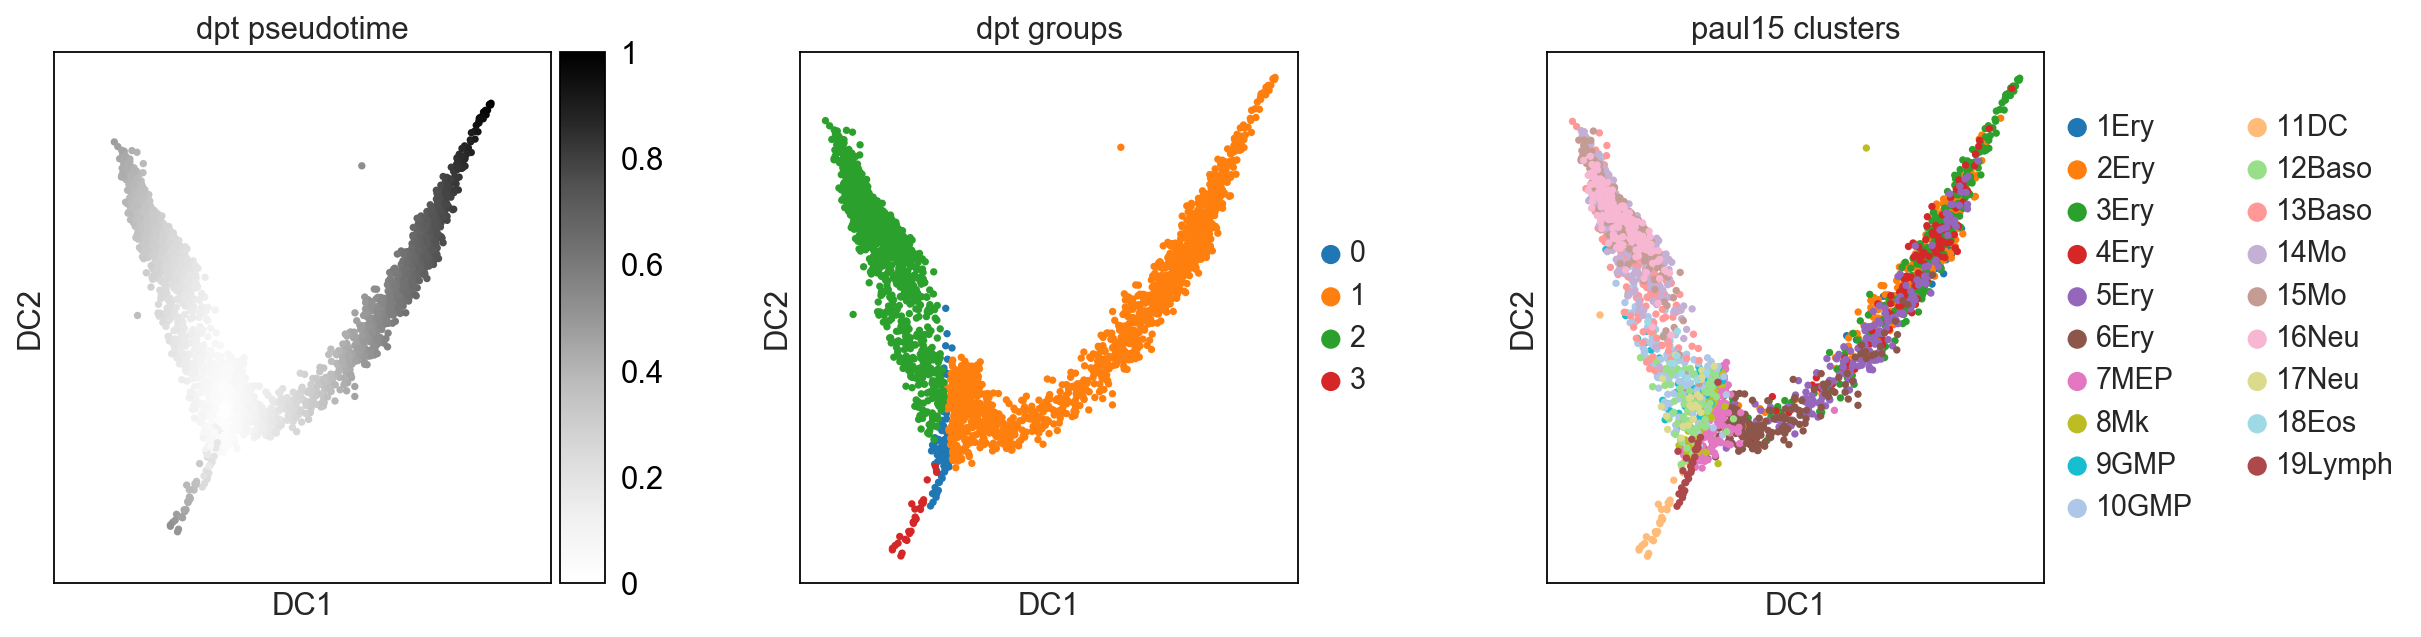

In [4]:
sc.pl.dpt_scatter(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

With this, we reproduced the analysis of [Haghverdi *et al.* (2016, Suppl. Note 4 and Suppl. Figure N4)](https://doi.org/10.1038/nmeth.3971).

Save the results.

In [5]:
sc.write('paul15', adata)

### Visualize with tSNE

It's always good, to look at a second visualization.

In [6]:
sc.tl.tsne(adata)

computing tSNE
    preprocess using PCA with 50 PCs
--> avoid this by setting n_pcs = 0
    using 50 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:17.522):  added
    "X_tsne", tSNE coordinates (adata.smp)


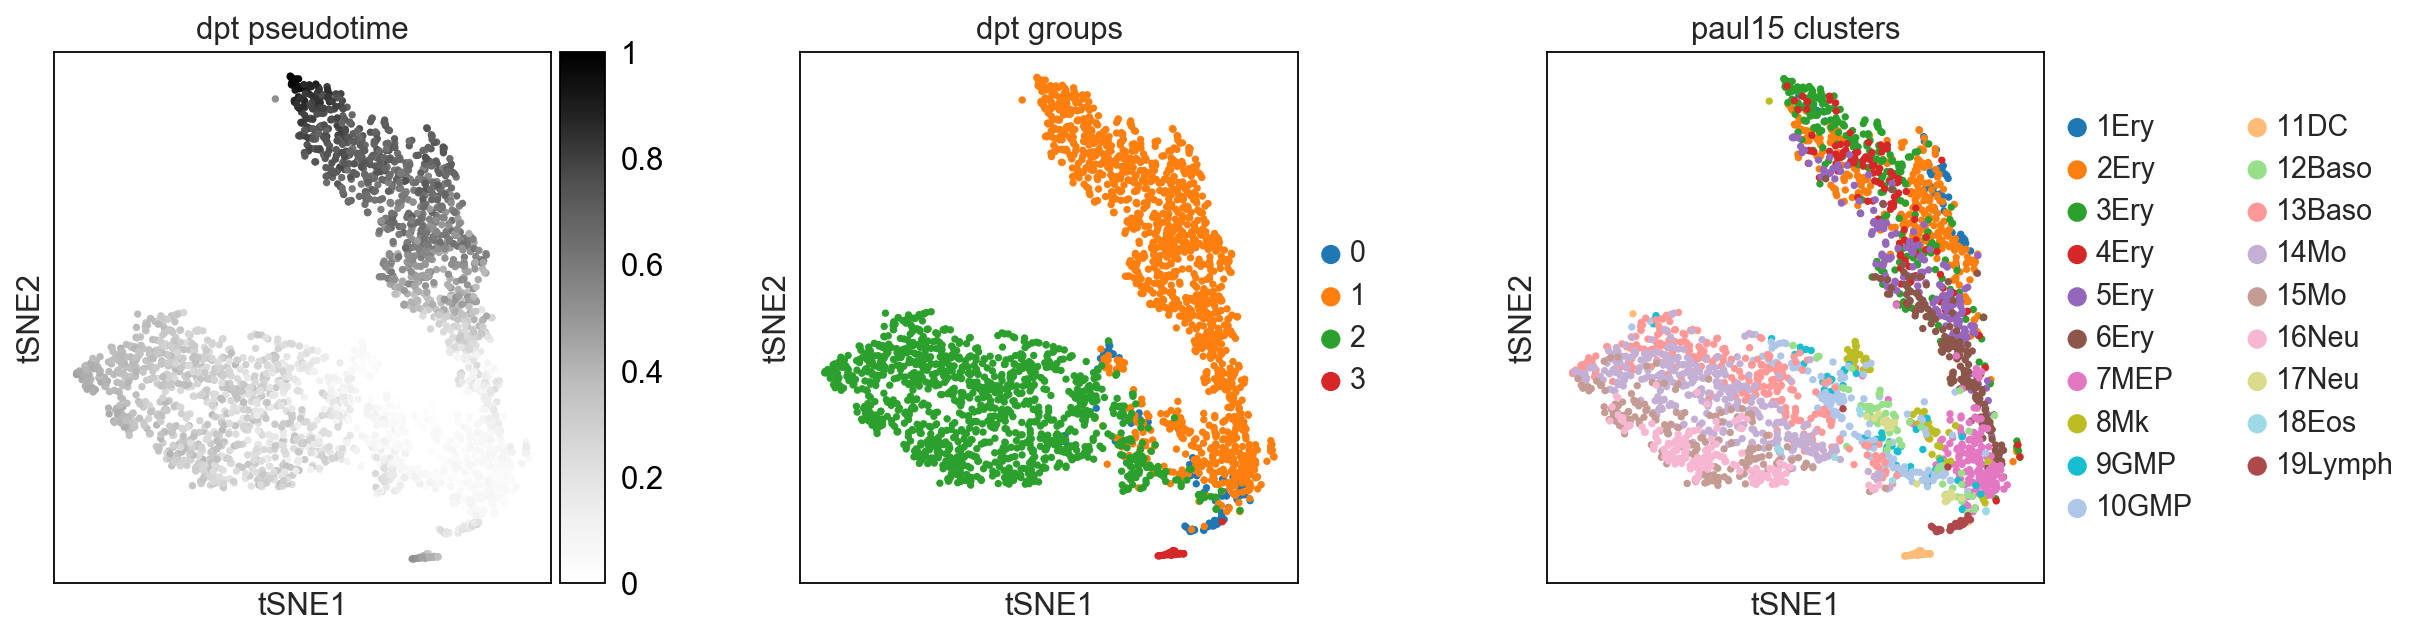

In [7]:
axs = sc.pl.tsne(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

### Using a preprocessing recipe

To make the geometry of the data pronounced, select highly variable genes as done by [Zheng *et al.*, (2017)](http://doi.org/10.1038/ncomms14049).

In [8]:
adata = sc.datasets.paul15_raw()

... storing paul15_clusters as categorical type
--> access categories as adata.smp.paul15_clusters.cat.categories


In [9]:
adata = sc.datasets.paul15_raw()
sc.pp.recipe_zheng17(adata)

... storing paul15_clusters as categorical type
--> access categories as adata.smp.paul15_clusters.cat.categories
normalizing by total count per cell
    finished (0:00:00.121): normalized adata.X and added
    'n_counts_all', counts per cell before normalization (adata.smp)
filter highly variable genes by dispersion and mean (0:00:00.261)
normalizing by total count per cell
    finished (0:00:00.059): normalized adata.X and added
    'n_counts', counts per cell before normalization (adata.smp)


Let us compute the tSNE coordinates for visualization.

computing tSNE
    preprocess using PCA with 50 PCs
--> avoid this by setting n_pcs = 0
    using 50 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:12.702):  added
    "X_tsne", tSNE coordinates (adata.smp)


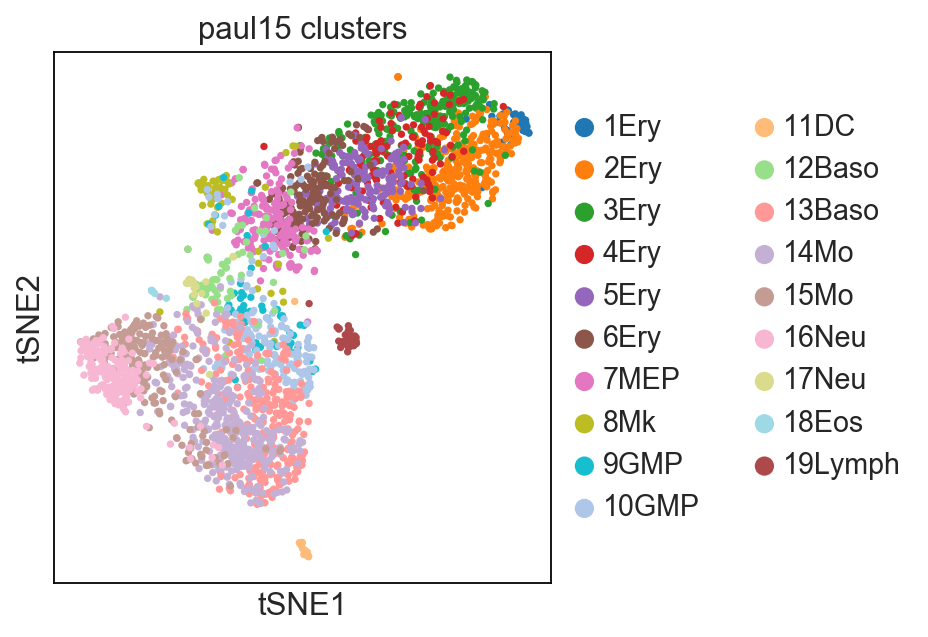

In [10]:
sc.tl.tsne(adata)
axs = sc.pl.tsne(adata, color=['paul15_clusters'])

Detect the single branching into myeloids and erythroids.

In [11]:
sc.tl.dpt(adata, n_branchings=1, n_neighbors=20)

perform Diffusion Pseudotime analysis
    using "X_pca" for building graph
    computing data graph with n_neighbors = 20 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9899151921  0.9675537348  0.9564409852  0.93884027
      0.91275841    0.8792349696  0.8754199743  0.8671839833  0.8410307765]
    detect 1 branching
    do not consider groups with less than 27 points for splitting
    branching 1: split group 0
finished (0:00:02.999) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


Now DPT finds the branch of dendritic cells.

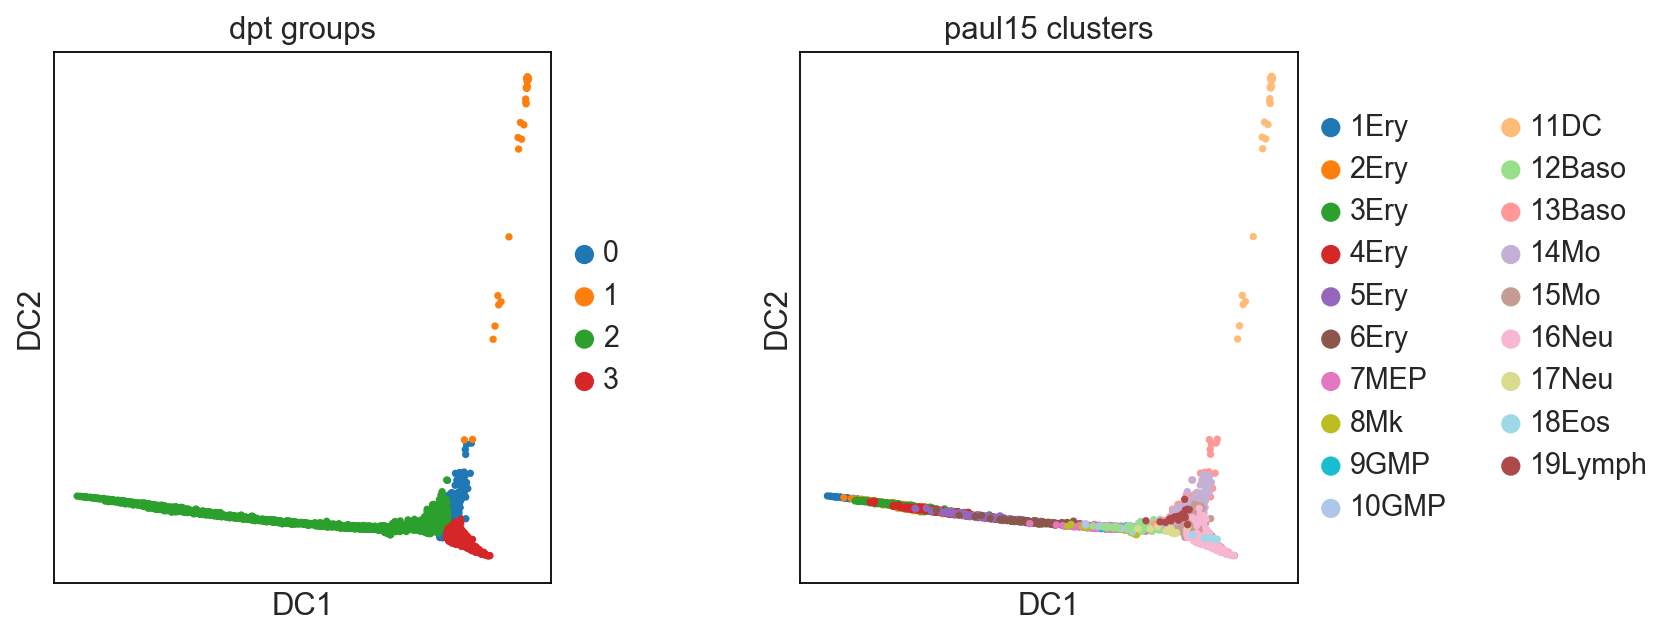

In [12]:
axs = sc.pl.diffmap(adata, color=['dpt_groups', 'paul15_clusters'])

Brnach 3 is solely composed of myeloids, but branch 2 contains erythroids and myeloids.

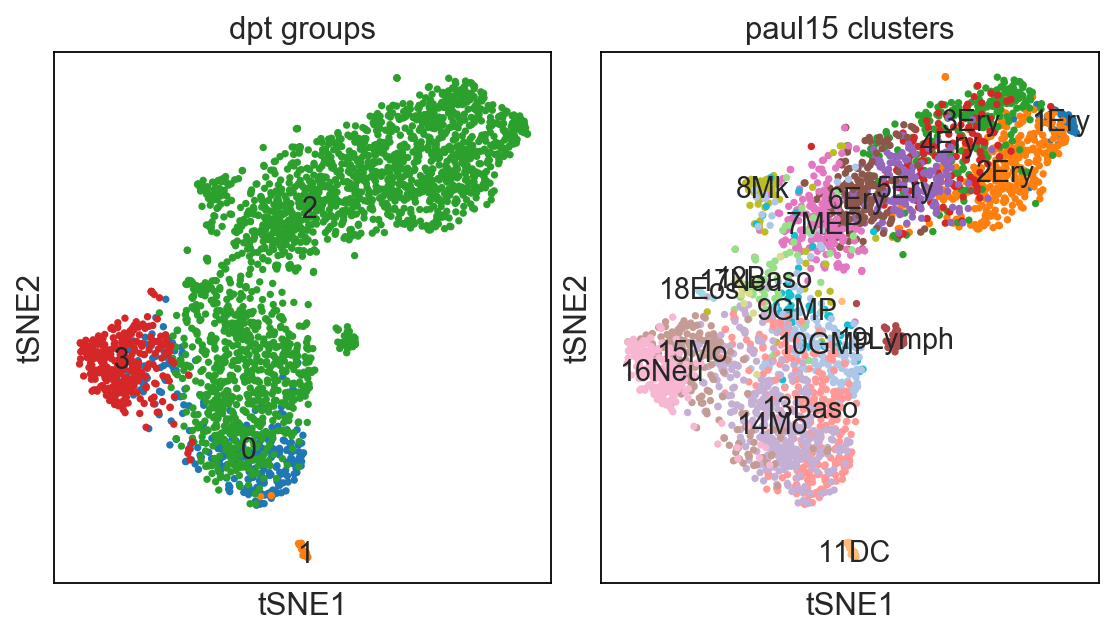

In [13]:
axs = sc.pl.tsne(adata, color=['dpt_groups', 'paul15_clusters'], legend_loc='on data')

Saving the results.

In [14]:
sc.write('paul15', adata)